# <font color=dodgerblue> Visual check of individual runs according to session name
***
### To visually check all the position data classified as an individual run.
### It will be necessary to determine which runs are "real" and with are not and, secondly, it will allow the building of a run specs file per session, containing run-relevant information such as stim condition, outcome etc.
### The raw timestamped position dataframe (no run specifications) will be saved into the files_path
***

## <font color=firebrick>Imports
***

In [6]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

from collect_and_organize_position_data_optogenetics import collect_and_organize_position_data

## <font color=firebrick> Inputs
***

In [7]:
files_path = "E:\POSITION DATA\PANTUFA_CTRL7"
session ="2021-02-18T11_00_45"

## <font color=mediumseagreen> Collect data and save into a .csv file
***
    
#### Collection of a dataframe with the timestamped position data from all sessions.
#### Interpolates NaN values and zeros in the data and checks for length discrepancies for same session position and timestamp data
#### Subdivides the position data into runs, labelling them with a run number and the corresponding session

In [8]:
# Collect a dataframe with position data from all sessions.
data = collect_and_organize_position_data(files_path)


 Opening timestamps:PANTUFA_DNMP8_XY_TIMESTAMPS_2021-02-18T11_00_45.csv. Length:112131

 Opening position:PANTUFA_DNMP8_CENTROID_POSITION2021-02-18T11_00_45.csv. Length:112131
2021-02-18T11_00_45
Series([], Name: diff, dtype: int64)
-100


In [9]:
# Drop timestamps with NaN
data = data.dropna(subset=['timestamp'])

## <font color=mediumseagreen> Save the timestamped position DataFrame into a .csv file
***

In [10]:
# Create a folder named "Timestamped_Position" inside the files path
try:
    os.mkdir(os.path.join(files_path, "Timestamped_Position"))
except:
    pass

In [11]:
# Find rat code in files_path.
match = re.search(r"_(\w+\d+)", files_path)
rat = match.group(1)

path = os.path.join(files_path,"Timestamped_Position", "%s_timestamped_position_df_raw.csv"%rat)
data.to_csv(path, header=True)

## <font color=mediumseagreen> Plot session runs to check individual runs
***

In [12]:
#Retrieve data from the given session
session_data = data[data["session"] == session]

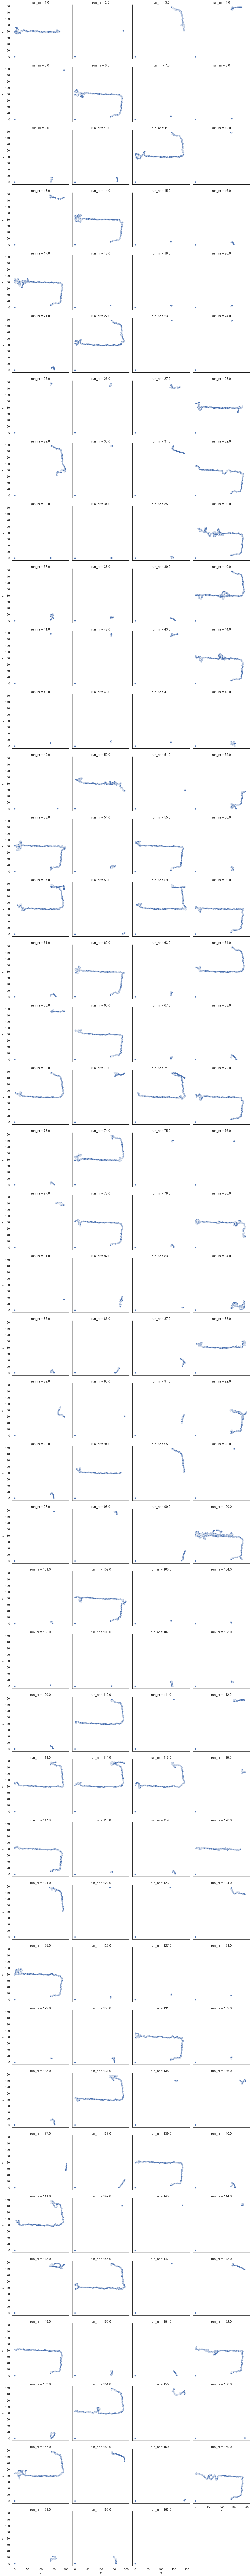

In [13]:
sns.set(style='white', context='talk')
g = sns.relplot(kind='scatter', data=session_data, x='x', y='y', col='run_nr', col_wrap=4)
plt.show()


# ***
# <font color=dodgerblue> Creating a run specs file
***


### Confirm that all runs are visually consistent with the rat's trajectories in space. Create a run_specs .csv file (for example: 'HEFESTO_RUN_SPECS_DNMP31_STIM10_2020-06-30T14_05_16.csv'), containing a mapping between the run numbers and each run information: 
   #### 1st. column - run_nr;  
   #### 2nd column - run_type ('S', sample or 'T', test); 
   #### 3rd column - stim_condition(0,1,3);
   #### 4th column - outcome(0 - error, 1 - correct). 
   #### If a run does not exist (is not visually consistent with a rat' trajectory, all other columns should contain 'NaN'.
   #### Column names should not be included in the file. They are added later on!
### Save as a .csv file into the directory containing the position and timestamp files, such that the run specifications can be added later on during the analysis.

# 